In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [32]:
df = pd.read_csv('april 4.csv')
need_columns = ['Идентификатор автора(ов)', 'Год','Цитирования','Организации','Краткое описание','Ключевые слова автора',
                'Ключевые слова указателя','Сведения о финансировании','Издатель']
df_filtered_1 = df[need_columns]

In [33]:
needed_words = ['high energy', 'quantum', 'particle physics', 'accelerator', 'collider experiments', 'hadron collider',
           'quantum field theory', 'quarks', 'higgs boson', 'standard Model', 'LHC', 'leptons', 'neutrinos', 'accelerators', 'dark matter', 'CP violation',
           'high energy physics', 'collider', 'supersymmetry', 'gluons', 'string theory', 'quantum chromodynamics (QCD)','electroweak interaction','heavy-ion collisions',
            'grand unified theory', 'cosmic rays', 'muon']

In [119]:
def contains_needed_words(row):
    # Преобразуем каждое значение в строке в строку и объединяем
    text = ' '.join(row.astype(str))
    # Проверяем на наличие хотя бы одного нужного слова
    return any(word.lower() in text for word in needed_words)
def find_organization_counts(df):
    all_organizations = []

    for organizations in df_filtered_2['Организации']:
        org_list = [org.strip() for org in organizations.split(';')]
        all_organizations.extend(org_list)
    
    organizations_counts = Counter(all_organizations)
    return organizations_counts.most_common(30)

In [182]:
def find_organization_counts(df):
    all_organizations = []

    for organizations in df['Организации']:
        # Разделяем по ";"
        org_list = [org.strip() for org in organizations.split(';')]
        
        for org in org_list:
            # Дополнительно разделяем по "China"
            parts = org.split(', China')
            
            for i in range(len(parts)):
                part = parts[i].strip()

                # Если это не последняя часть, добавляем ", China" обратно
                if i < len(parts) - 1:
                    part += ', China'
                part = ' '.join(part.split())
                # Проверяем наличие "China" и добавляем в список
                if 'China' in part:
                    parts = org.split(',')
                    if len(parts)>4:
                        all_organizations.append(part)
    
    # Подсчитываем количество каждого уникального элемента
    organizations_counts = Counter(all_organizations)
    return organizations_counts.most_common(4)

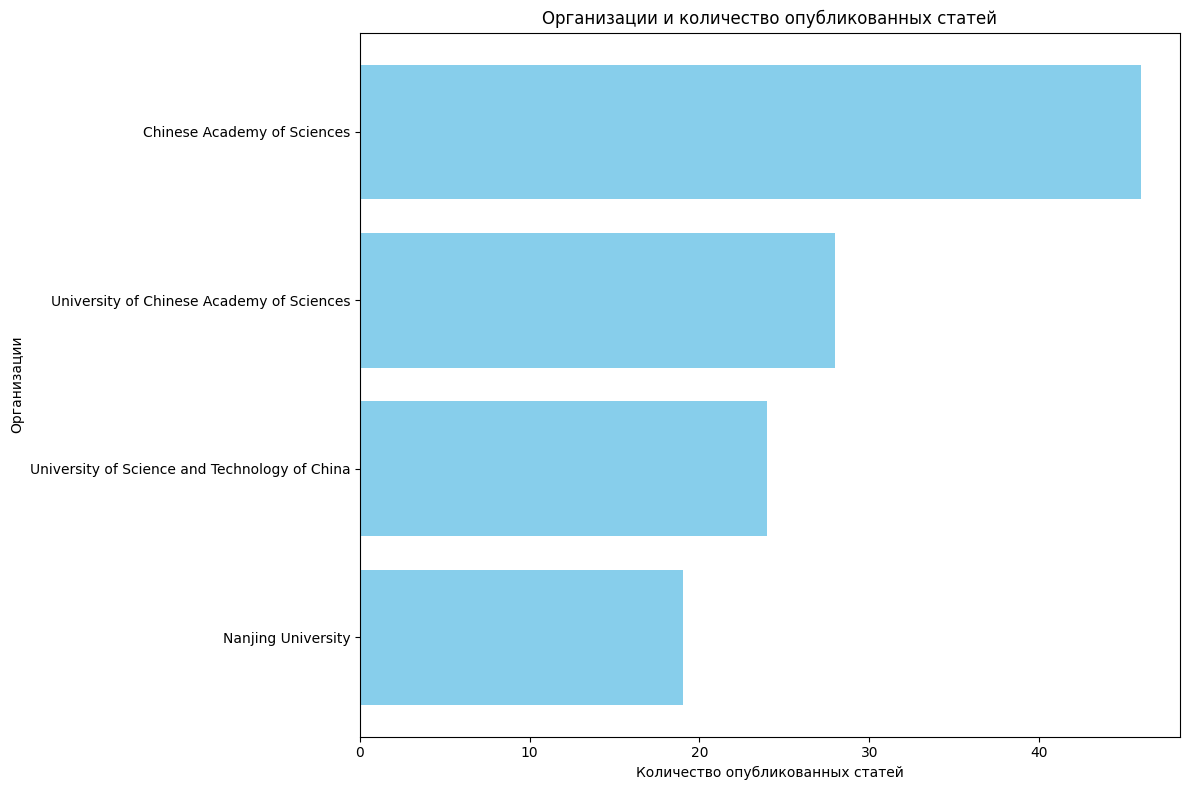

In [183]:
df_filtered_2 = df_filtered_1[df_filtered_1.apply(contains_needed_words, axis=1)].copy()
organizations_counts = find_organization_counts(df_filtered_2)
organizations_full = [org for org, count in organizations_counts] 
organizations = [org.split(',')[0] for org, count in organizations_counts]
counts = [count for org, count in organizations_counts] 
plt.figure(figsize=(12, 8))
plt.barh(organizations, counts, color='skyblue')
plt.xlabel('Количество опубликованных статей')
plt.ylabel('Организации')
plt.title('Организации и количество опубликованных статей')
plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

                                         Organization  Count
0   University of Chinese Academy of Sciences, Bei...     21
1   Center of Materials Science and Optoelectronic...      9
2   Beijing Computational Science Research Center,...      8
3   Institute of High Energy Physics, Chinese Acad...      7
4    Institute of High Energy Physics, Beijing, China      6
5   Institute of Modern Physics, Chinese Academy o...      6
6                  Beihang University, Beijing, China      5
7   State Key Laboratory of Nuclear Physics and Te...      5
8   University of Science and Technology of China,...      5
9   Songshan Lake Materials Laboratory, Dongguan, ...      5
10  Department of Physics, Zhejiang Normal Univers...      5
11  Department of Physics, Tsinghua University, Be...      4
12               Zhejiang University, Hangzhou, China      4
13  State Key Laboratory of Particle Detection and...      4
14  School of Physical Sciences, University of Chi...      4
15  Department of Physic

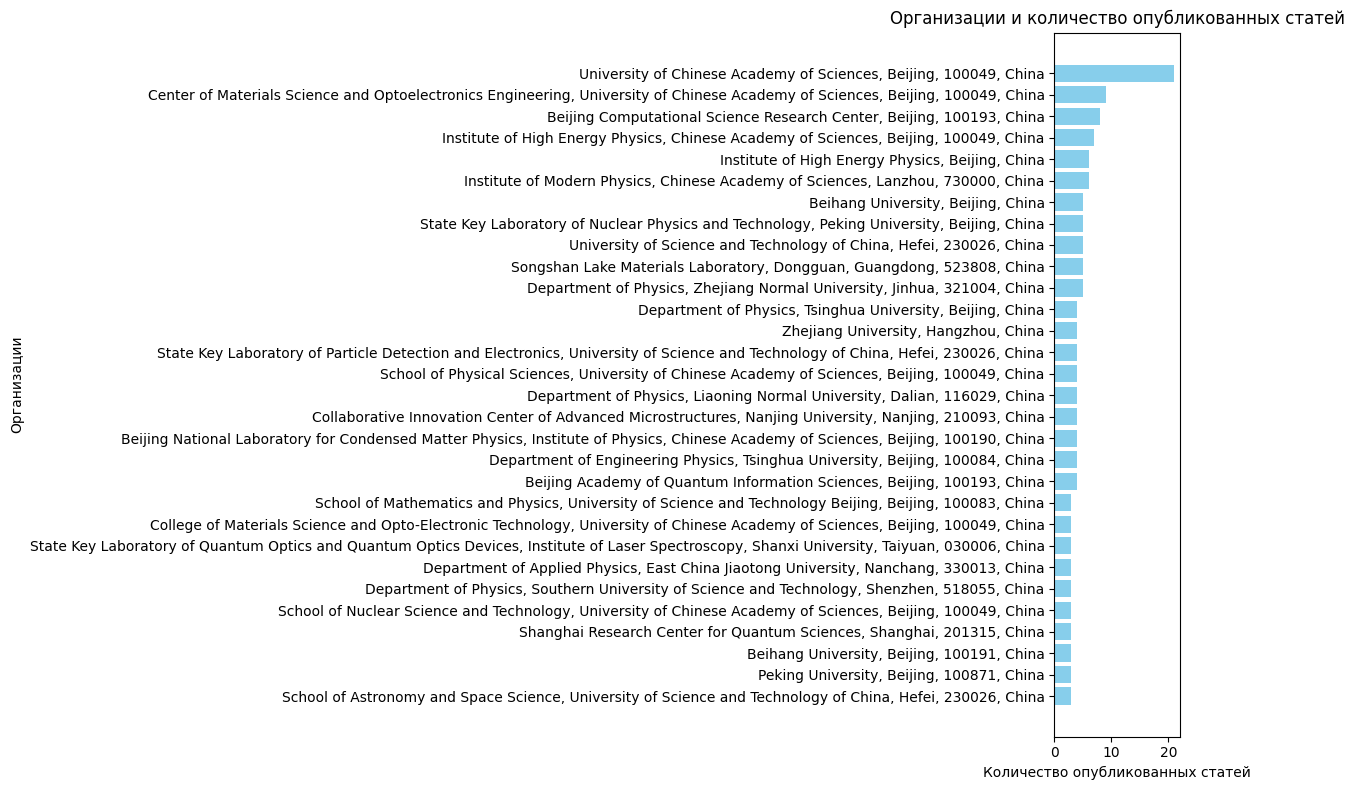

In [135]:
organizations_counts = find_organization_counts(df_filtered_2)

# Создаём DataFrame из списка кортежей
df_organizations = pd.DataFrame(organizations_counts, columns=['Organization', 'Count'])

# Теперь вы можете вывести таблицу с организациями и количеством публикаций
print(df_organizations)

# Опционально: создание столбчатой диаграммы
plt.figure(figsize=(12, 8))
plt.barh(df_organizations['Organization'], df_organizations['Count'], color='skyblue')
plt.xlabel('Количество опубликованных статей')
plt.ylabel('Организации')
plt.title('Организации и количество опубликованных статей')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

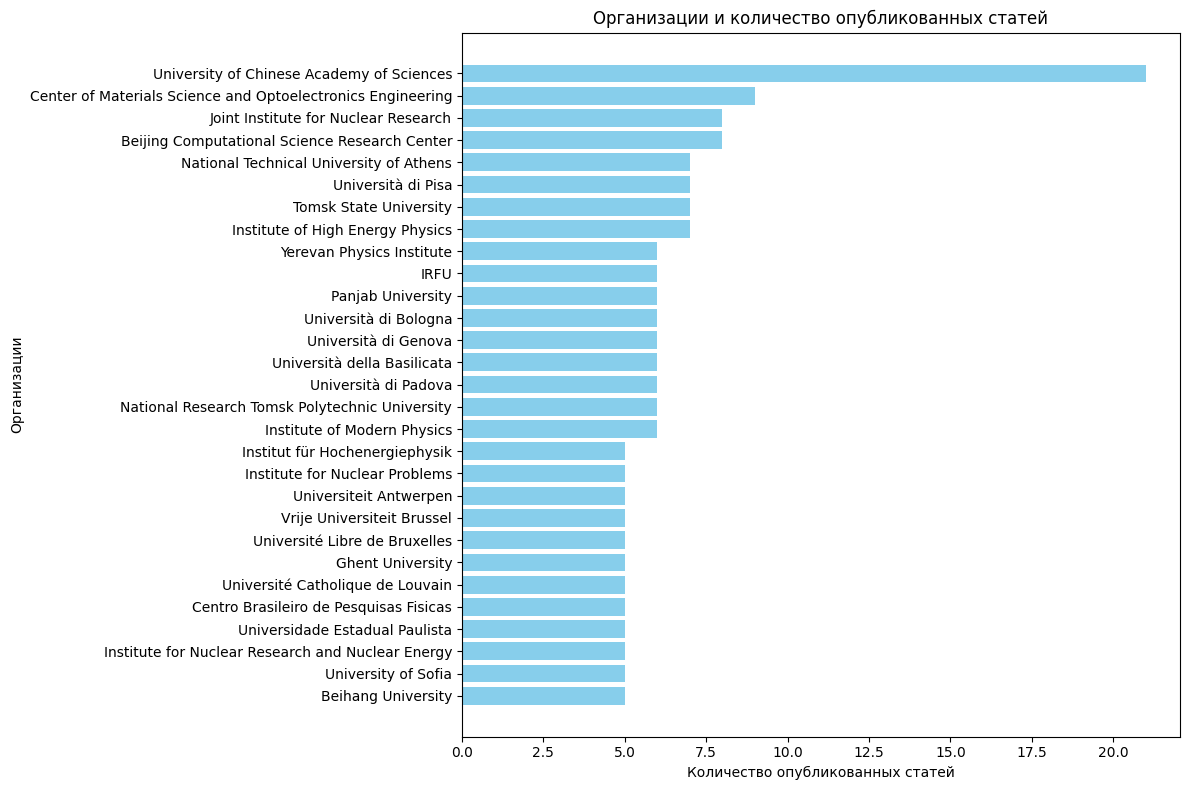

In [103]:
df_filtered_2 = df_filtered_1[df_filtered_1.apply(contains_needed_words, axis=1)].copy()
organizations_counts = find_organization_counts(df_filtered_2)
organizations_full = [org for org, count in organizations_counts] 
organizations = [org.split(',')[0] for org, count in organizations_counts]
counts = [count for org, count in organizations_counts] 
plt.figure(figsize=(12, 8))
plt.barh(organizations, counts, color='skyblue')
plt.xlabel('Количество опубликованных статей')
plt.ylabel('Организации')
plt.title('Организации и количество опубликованных статей')
plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()